#Car Damage detection using yolo algorithm:


In [ ]:
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.preprocessing.sequence import pad_sequences

In [ ]:
from keras import Input, layers
from keras import optimizers
from keras.optimizers import Adam
from keras.preprocessing import sequence
# from keras.preprocessing import image
# from keras_preprocessing.sequence import pad_sequences
# from keras.utils.data_utils import pad_sequences
from keras.preprocessing.sequence import pad_sequences
from keras.utils import load_img, img_to_array
from keras.preprocessing.text import Tokenizer
from keras.layers import LSTM, Embedding, Dense, Activation, Flatten, Reshape, Dropout
"""
    Creates an LSTM model for a sequence classification task.

    Parameters:
    - input_dim (int): The size of the vocabulary (i.e., the number of unique words).
    - output_dim (int): The dimension of the dense embedding.
    - input_length (int): Length of input sequences.
    - embedding_dim (int): Dimension of the dense embedding layer.
    - lstm_units (int): Number of LSTM units in the layer.
    - dropout_rate (float): Dropout rate between LSTM and Dense layers.

    Returns:
    - keras.models.Model: A compiled LSTM model.

    """

'\n    Creates an LSTM model for a sequence classification task.\n\n    Parameters:\n    - input_dim (int): The size of the vocabulary (i.e., the number of unique words).\n    - output_dim (int): The dimension of the dense embedding.\n    - input_length (int): Length of input sequences.\n    - embedding_dim (int): Dimension of the dense embedding layer.\n    - lstm_units (int): Number of LSTM units in the layer.\n    - dropout_rate (float): Dropout rate between LSTM and Dense layers.\n\n    Returns:\n    - keras.models.Model: A compiled LSTM model.\n    \n    '

In [ ]:
from keras.layers import Bidirectional, add
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.models import Model
from keras.utils import to_categorical

In [ ]:
# !unzip /content/drive/MyDrive/yolov7/Annotated_Cars_Dataset.zip

In [ ]:
# !wget http://nlp.stanford.edu/data/glove.6B.zip

In [ ]:
# !unzip /content/glove.6B.zip

# DATA TO BE USED

In [ ]:
token_path = "/content/drive/MyDrive/yolov7/data/damage_data.token.txt"
train_images_path = '/content/drive/MyDrive/yolov7/data/train.txt'
test_images_path = '/content/drive/MyDrive/yolov7/data/test.txt'
images_path = '/content/drive/MyDrive/yolov7/Annotated_Cars_Dataset/images/'
glove_path = '/content/drive/MyDrive/yolov7/data/glove6b/'

In [ ]:
doc = open(token_path,'r').read()
print(doc[:416])

FileNotFoundError: ignored

In [ ]:
table = str.maketrans('', '', string.punctuation)
for key, desc_list in descriptions.items():
    for i in range(len(desc_list)):
        desc = desc_list[i]
        desc = desc.split()
        desc = [word.lower() for word in desc]
        desc = [w.translate(table) for w in desc]
        desc_list[i] =  ' '.join(desc)

"""
Preprocess Descriptions in a Dictionary by Removing Punctuation and Lowercasing.

This code iterates over a dictionary containing image descriptions, preprocesses each description,
and removes punctuation while converting all words to lowercase.

Parameters:
- descriptions (dict): A dictionary where keys are image IDs, and values are lists of descriptions associated with each image.

Returns:
- None: The descriptions in the input dictionary are modified in-place.

"""

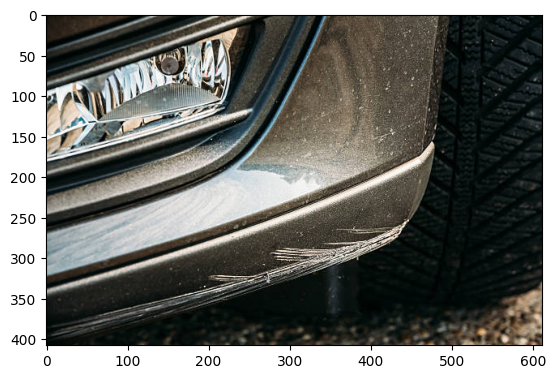

['a car with a scratch']

In [ ]:
pic = 'f531dc35-125432068.jpg'
x=plt.imread(images_path+pic)
plt.imshow(x)
plt.show()
descriptions['f531dc35-125432068']

In [ ]:
vocabulary = set()
for key in descriptions.keys():
        [vocabulary.update(d.split()) for d in descriptions[key]]
print('Original Vocabulary Size: %d' % len(vocabulary))

"""
    Build a vocabulary from a dictionary of image descriptions.

    Parameters:
    - descriptions (dict): A dictionary where keys are image identifiers and values
      are lists of associated descriptions.

    Returns:
    - set: A set containing unique words in the provided descriptions.


    This function processes the descriptions and updates a vocabulary set with unique words.
    """

Original Vocabulary Size: 9


In [ ]:
lines = list()
for key, desc_list in descriptions.items():
    for desc in desc_list:
        lines.append(key + ' ' + desc)
new_descriptions = '\n'.join(lines)

"""
Create a List of Lines Combining Image IDs and Descriptions, then Join into a Single String.

This code processes a dictionary containing image descriptions, combining image IDs with corresponding descriptions.
It creates a list of lines, where each line is formed by concatenating the image ID and description, and then joins
these lines into a single string.

Parameters:
- descriptions (dict): A dictionary where keys are image IDs, and values are lists of descriptions associated with each image.

Returns:
- str: A string formed by joining lines, where each line contains an image ID and its corresponding description.

"""

In [ ]:
new_descriptions

'f531dc35-125432068 a car with a scratch\n79304c84-125432049 a car with no damage\n3abf7e00-125432006 a car with a scratch\ne84d49b9-125432004 a car with a scratch\nf59fc364-125432002 a car with a dent\ncb8b4cf3-125431991 a car with a dent\n60258cb3-125431989 a broken car\n59d7d1ac-125431970 a crushed car\nd774c50d-125431964 a car with a dent\n3fe59d90-125431953 a broken car\n700ff59c-125431946 a crushed car\n7a18e463-125431945 a crushed car\nc4ed5c0b-125431943 a car with a dent\nfcf70dd6-125431922 a car with a scratch\n8cd345cd-125431913 a car with no damage\nf56ee9fa-125431905 a car with a scratch\nf56ee9fa-125431905 a car with a scratch\n3e548778-125431904 a car with a scratch\n7b1226c5-125431891 a car with a scratch\ndeb567fa-125431889 a car with a scratch\ndeb567fa-125431889 a car with a scratch\ndeb567fa-125431889 a car with a scratch\nbe1ee863-125431887 a car with a dent\n6657410e-125431886 a car with a scratch\na7f006dc-125431882 a car with a dent\n6730143b-125431881 a broken c

In [ ]:
doc = open(train_images_path,'r').read()
dataset = list()
for line in doc.split('\n'):
    if len(line) > 1:
      identifier = line.split('.')[0]
      dataset.append(identifier)

train = set(dataset)

"""
Read Image Identifiers from a File and Create a Training Dataset.

This code reads image identifiers from a file, extracts identifiers from each line, and forms a training dataset.

Parameters:
- train_images_path (str): Path to the file containing image identifiers.

Returns:
- set: A set containing unique image identifiers forming the training dataset.

"""

In [ ]:
train

{'47654169-125413826',
 '821b4d3b-125419298',
 '6b1e1c3b-125431850',
 '5311b788-125429673',
 '70c42ac4-125418146',
 '45096fa8-125419143',
 '7d25a968-125421427',
 '82bc5252-125429726',
 '7730f702-125430828',
 'ec89b5d6-125418543',
 '6ff6401a-125416569',
 '403f0c42-125418738',
 '54d8e5ca-125431787',
 'bdb1d195-125429030',
 '90e57079-125416954',
 '1fc3d7b1-125418441',
 '54c5dfbd-125428632',
 'fec18a23-125431536',
 'c7b88733-125415251',
 '3b1120c8-125413985',
 'af5f3601-125428907',
 'e814c26a-125415724',
 'b81ae2f3-125413850',
 '7d057346-125423051',
 '6d0917a9-125415778',
 'f4dff6ef-125417492',
 '5d14e429-125431751',
 'c223ea0e-125412522',
 '666cafdc-125429075',
 '61ee762d-125430115',
 '3f18b845-125421468',
 '4f0d78ff-125416270',
 'a0b262dc-125430066',
 'e06cbb53-125416276',
 '6736fe5f-125416982',
 'bab36bdc-125429212',
 'b65f5a73-125428563',
 'f6b59238-125419738',
 '99923e61-125429158',
 'e8b7f0db-125430719',
 '79669bef-125415520',
 '9cff7a4a-125425243',
 'e0328a10-125419607',
 '7eabbcca-

In [ ]:
img = glob.glob(images_path + '*.jpg')
print("img - ", img)
train_images = set(open(train_images_path, 'r').read().strip().split('\n'))
print("train_images - ", train_images)
train_img = []
for i in img:
    if i[len(images_path):] in train_images:
        train_img.append(i)

test_images = set(open(test_images_path, 'r').read().strip().split('\n'))
test_img = []
for i in img:
    if i[len(images_path):] in test_images:
        test_img.append(i)

img -  ['/content/drive/MyDrive/yolov7/Annotated_Cars_Dataset/images/88825c05-125412555.jpg', '/content/drive/MyDrive/yolov7/Annotated_Cars_Dataset/images/86dffabf-125429708.jpg', '/content/drive/MyDrive/yolov7/Annotated_Cars_Dataset/images/7128b56a-125421130.jpg', '/content/drive/MyDrive/yolov7/Annotated_Cars_Dataset/images/8e600749-125430591.jpg', '/content/drive/MyDrive/yolov7/Annotated_Cars_Dataset/images/662acd41-125431869.jpg', '/content/drive/MyDrive/yolov7/Annotated_Cars_Dataset/images/68506a8d-125431464.jpg', '/content/drive/MyDrive/yolov7/Annotated_Cars_Dataset/images/75cd383e-125416293.jpg', '/content/drive/MyDrive/yolov7/Annotated_Cars_Dataset/images/7cfcb09b-125431279.jpg', '/content/drive/MyDrive/yolov7/Annotated_Cars_Dataset/images/7208fd9a-125430067.jpg', '/content/drive/MyDrive/yolov7/Annotated_Cars_Dataset/images/87dab4df-125419675.jpg', '/content/drive/MyDrive/yolov7/Annotated_Cars_Dataset/images/7f6bdfd1-125414764.jpg', '/content/drive/MyDrive/yolov7/Annotated_Cars_

In [ ]:
train_img

['/content/drive/MyDrive/yolov7/Annotated_Cars_Dataset/images/88825c05-125412555.jpg',
 '/content/drive/MyDrive/yolov7/Annotated_Cars_Dataset/images/86dffabf-125429708.jpg',
 '/content/drive/MyDrive/yolov7/Annotated_Cars_Dataset/images/7128b56a-125421130.jpg',
 '/content/drive/MyDrive/yolov7/Annotated_Cars_Dataset/images/8e600749-125430591.jpg',
 '/content/drive/MyDrive/yolov7/Annotated_Cars_Dataset/images/662acd41-125431869.jpg',
 '/content/drive/MyDrive/yolov7/Annotated_Cars_Dataset/images/68506a8d-125431464.jpg',
 '/content/drive/MyDrive/yolov7/Annotated_Cars_Dataset/images/75cd383e-125416293.jpg',
 '/content/drive/MyDrive/yolov7/Annotated_Cars_Dataset/images/7cfcb09b-125431279.jpg',
 '/content/drive/MyDrive/yolov7/Annotated_Cars_Dataset/images/7208fd9a-125430067.jpg',
 '/content/drive/MyDrive/yolov7/Annotated_Cars_Dataset/images/87dab4df-125419675.jpg',
 '/content/drive/MyDrive/yolov7/Annotated_Cars_Dataset/images/7f6bdfd1-125414764.jpg',
 '/content/drive/MyDrive/yolov7/Annotated_C

In [ ]:
train_descriptions = dict()
for line in new_descriptions.split('\n'):
    tokens = line.split()
    image_id, image_desc = tokens[0], tokens[1:]
    if image_id in train:
        if image_id not in train_descriptions:
            train_descriptions[image_id] = list()
        desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
        train_descriptions[image_id].append(desc)

"""
Create Training Descriptions Dictionary from a String.

This code processes a string containing image identifiers and descriptions, splits the string into lines,
and forms a dictionary where keys are image IDs present in the training set and values are lists of preprocessed descriptions.

Parameters:
- new_descriptions (str): String containing image identifiers and descriptions.
- train (set): Set of image identifiers forming the training dataset.

Returns:
- dict: A dictionary where keys are image IDs from the training set, and values are lists of preprocessed descriptions.

"""

In [ ]:
train_descriptions

{'f531dc35-125432068': ['startseq a car with a scratch endseq'],
 '79304c84-125432049': ['startseq a car with no damage endseq'],
 '3abf7e00-125432006': ['startseq a car with a scratch endseq'],
 'e84d49b9-125432004': ['startseq a car with a scratch endseq'],
 'f59fc364-125432002': ['startseq a car with a dent endseq'],
 'cb8b4cf3-125431991': ['startseq a car with a dent endseq'],
 '60258cb3-125431989': ['startseq a broken car endseq'],
 '59d7d1ac-125431970': ['startseq a crushed car endseq'],
 'd774c50d-125431964': ['startseq a car with a dent endseq'],
 '3fe59d90-125431953': ['startseq a broken car endseq'],
 '700ff59c-125431946': ['startseq a crushed car endseq'],
 '7a18e463-125431945': ['startseq a crushed car endseq'],
 'c4ed5c0b-125431943': ['startseq a car with a dent endseq'],
 'fcf70dd6-125431922': ['startseq a car with a scratch endseq'],
 '8cd345cd-125431913': ['startseq a car with no damage endseq'],
 'f56ee9fa-125431905': ['startseq a car with a scratch endseq',
  'startse

In [ ]:
all_train_captions = []
for key, val in train_descriptions.items():
    for cap in val:
        all_train_captions.append(cap)

In [ ]:
all_train_captions

['startseq a car with a scratch endseq',
 'startseq a car with no damage endseq',
 'startseq a car with a scratch endseq',
 'startseq a car with a scratch endseq',
 'startseq a car with a dent endseq',
 'startseq a car with a dent endseq',
 'startseq a broken car endseq',
 'startseq a crushed car endseq',
 'startseq a car with a dent endseq',
 'startseq a broken car endseq',
 'startseq a crushed car endseq',
 'startseq a crushed car endseq',
 'startseq a car with a dent endseq',
 'startseq a car with a scratch endseq',
 'startseq a car with no damage endseq',
 'startseq a car with a scratch endseq',
 'startseq a car with a scratch endseq',
 'startseq a car with a scratch endseq',
 'startseq a car with a scratch endseq',
 'startseq a car with a scratch endseq',
 'startseq a car with a scratch endseq',
 'startseq a car with a scratch endseq',
 'startseq a car with a dent endseq',
 'startseq a car with a scratch endseq',
 'startseq a car with a dent endseq',
 'startseq a broken car endseq

In [ ]:
word_count_threshold = 10
word_counts = {}
nsents = 0
for sent in all_train_captions:
    nsents += 1
    for w in sent.split(' '):
        word_counts[w] = word_counts.get(w, 0) + 1
vocab = [w for w in word_counts if word_counts[w] >= word_count_threshold]

print('Vocabulary = %d' % (len(vocab)))

"""
Create a Vocabulary from Training Captions Based on Word Count Threshold.

This code processes a list of training captions, counts the occurrences of each word, and forms a vocabulary based on a specified word count threshold.

Parameters:
- all_train_captions (list): List of training captions.
- word_count_threshold (int): Minimum count of occurrences for a word to be included in the vocabulary.

Returns:
- list: A list containing words that meet the specified word count threshold.

"""

Vocabulary = 11


In [ ]:
ixtoword = {}
wordtoix = {}
ix = 1
for w in vocab:
    wordtoix[w] = ix
    ixtoword[ix] = w
    ix += 1

vocab_size = len(ixtoword) + 1

"""
Create Mapping between Words and Indices for Vocabulary.

This code processes a vocabulary list, assigns unique indices to each word, and creates mappings between words and their corresponding indices.

Parameters:
- vocab (list): List of words forming the vocabulary.

Returns:
- dict: A dictionary mapping words to indices.
- dict: A dictionary mapping indices to words.
- int: Size of the vocabulary.

"""

In [ ]:
all_desc = list()
for key in train_descriptions.keys():
    [all_desc.append(d) for d in train_descriptions[key]]
lines = all_desc
max_length = max(len(d.split()) for d in lines)

print('Description Length: %d' % max_length)

"""
    Find the maximum length of descriptions in a training dataset.

    Parameters:
    - train_descriptions (dict): A dictionary where keys are image identifiers and values
      are lists of associated training descriptions.

    Returns:
    - int: The maximum length of descriptions in the training dataset.

    """

Description Length: 7


In [ ]:
embeddings_index = {}
f = open(os.path.join(glove_path, 'glove.6B.200d.txt'), encoding="utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs

"""
Load Pre-trained Word Embeddings from GloVe File.

This code reads pre-trained word embeddings from a GloVe file and stores them in a dictionary.

Parameters:
- glove_path (str): Path to the directory containing the GloVe file.
- embedding_dim (int): Dimensionality of the word embeddings.

Returns:
- dict: A dictionary where keys are words and values are arrays representing word embeddings.

"""

In [ ]:
embeddings_index

{'the': array([-7.1549e-02,  9.3459e-02,  2.3738e-02, -9.0339e-02,  5.6123e-02,
         3.2547e-01, -3.9796e-01, -9.2139e-02,  6.1181e-02, -1.8950e-01,
         1.3061e-01,  1.4349e-01,  1.1479e-02,  3.8158e-01,  5.4030e-01,
        -1.4088e-01,  2.4315e-01,  2.3036e-01, -5.5339e-01,  4.8154e-02,
         4.5662e-01,  3.2338e+00,  2.0199e-02,  4.9019e-02, -1.4132e-02,
         7.6017e-02, -1.1527e-01,  2.0060e-01, -7.7657e-02,  2.4328e-01,
         1.6368e-01, -3.4118e-01, -6.6070e-02,  1.0152e-01,  3.8232e-02,
        -1.7668e-01, -8.8153e-01, -3.3895e-01, -3.5481e-02, -5.5095e-01,
        -1.6899e-02, -4.3982e-01,  3.9004e-02,  4.0447e-01, -2.5880e-01,
         6.4594e-01,  2.6641e-01,  2.8009e-01, -2.4625e-02,  6.3302e-01,
        -3.1700e-01,  1.0271e-01,  3.0886e-01,  9.7792e-02, -3.8227e-01,
         8.6552e-02,  4.7075e-02,  2.3511e-01, -3.2127e-01, -2.8538e-01,
         1.6670e-01, -4.9707e-03, -6.2714e-01, -2.4904e-01,  2.9713e-01,
         1.4379e-01, -1.2325e-01, -5.8178e-0

In [ ]:
embedding_dim = 200
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in wordtoix.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

"""
Create Embedding Matrix for Words in Vocabulary.

This code generates an embedding matrix for words in the vocabulary by assigning pre-trained word embeddings to corresponding positions.

Parameters:
- embeddings_index (dict): Dictionary with pre-trained word embeddings.
- word_to_ix (dict): Dictionary mapping words to indices.
- vocab_size (int): Size of the vocabulary.
- embedding_dim (int): Dimensionality of the word embeddings.

Returns:
- np.ndarray: A 2D NumPy array representing the embedding matrix.

"""

In [ ]:
model = InceptionV3(weights='imagenet')

"""
Instantiate InceptionV3 Model with Pre-trained Weights.

This code instantiates the InceptionV3 model with pre-trained weights on the ImageNet dataset.

Parameters:
- weights (str): Specifies the weight checkpoint to load. If 'imagenet', it loads pre-trained ImageNet weights.

Returns:
- InceptionV3: An instance of the InceptionV3 model with specified weights.

"""

96112376/96112376 [==============================] - 1s 0us/step


In [ ]:
model_new = Model(model.input, model.layers[-2].output)

"""
Create a New Model by Extracting Features from Pre-trained Model.

This code creates a new model by taking the input from the original pre-trained model and extracting features from a specific layer.

Parameters:
- model (keras.Model): Original pre-trained model.
- output_layer_index (int): Index of the layer from which features are to be extracted.

Returns:
- keras.Model: A new model with the same input as the original model but output from a specific layer.

"""

In [ ]:
def preprocess(image_path):
    img = load_img(image_path, target_size=(299, 299))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

"""
Preprocess Image for InceptionV3 Model.

This function preprocesses an image for compatibility with the InceptionV3 model.

Parameters:
- image_path (str): Path to the input image file.

Returns:
- np.ndarray: Preprocessed image as a NumPy array.

"""

In [ ]:
def encode(image):
    image = preprocess(image)
    fea_vec = model_new.predict(image)
    fea_vec = np.reshape(fea_vec, fea_vec.shape[1])
    print(fea_vec)
    return fea_vec

"""
Encode Image into Feature Vector Using Pre-trained InceptionV3 Model.

This function encodes an image into a feature vector using a pre-trained InceptionV3 model.

Parameters:
- image (str): Path to the input image file.

Returns:
- np.ndarray: Feature vector representing the image.

"""

In [ ]:
train_img

['/content/drive/MyDrive/yolov7/Annotated_Cars_Dataset/images/88825c05-125412555.jpg',
 '/content/drive/MyDrive/yolov7/Annotated_Cars_Dataset/images/86dffabf-125429708.jpg',
 '/content/drive/MyDrive/yolov7/Annotated_Cars_Dataset/images/7128b56a-125421130.jpg',
 '/content/drive/MyDrive/yolov7/Annotated_Cars_Dataset/images/8e600749-125430591.jpg',
 '/content/drive/MyDrive/yolov7/Annotated_Cars_Dataset/images/662acd41-125431869.jpg',
 '/content/drive/MyDrive/yolov7/Annotated_Cars_Dataset/images/68506a8d-125431464.jpg',
 '/content/drive/MyDrive/yolov7/Annotated_Cars_Dataset/images/75cd383e-125416293.jpg',
 '/content/drive/MyDrive/yolov7/Annotated_Cars_Dataset/images/7cfcb09b-125431279.jpg',
 '/content/drive/MyDrive/yolov7/Annotated_Cars_Dataset/images/7208fd9a-125430067.jpg',
 '/content/drive/MyDrive/yolov7/Annotated_Cars_Dataset/images/87dab4df-125419675.jpg',
 '/content/drive/MyDrive/yolov7/Annotated_Cars_Dataset/images/7f6bdfd1-125414764.jpg',
 '/content/drive/MyDrive/yolov7/Annotated_C

In [ ]:
encoding_train = {}
for img in train_img:
    print("-", img)
    encoding_train[img[len(images_path):]] = encode(img)
train_features = encoding_train

encoding_test = {}
for img in test_img:
    encoding_test[img[len(images_path):]] = encode(img)

"""
Encode Multiple Images into Feature Vectors Using Pre-trained InceptionV3 Model.

This code encodes a set of images into feature vectors using a pre-trained InceptionV3 model.

Parameters:
- image_paths (list): List of paths to input image files.

Returns:
- dict: A dictionary where keys are image names, and values are feature vectors representing the images.

"""

- /content/drive/MyDrive/yolov7/Annotated_Cars_Dataset/images/88825c05-125412555.jpg
1/1 [==============================] - 2s 2s/step
[0.18146051 0.19738777 0.76653224 ... 0.7289567  0.4624587  0.8268919 ]
- /content/drive/MyDrive/yolov7/Annotated_Cars_Dataset/images/86dffabf-125429708.jpg
1/1 [==============================] - 0s 423ms/step
[0.11016785 0.08738017 0.35780734 ... 0.52402425 0.10145284 0.11356532]
- /content/drive/MyDrive/yolov7/Annotated_Cars_Dataset/images/7128b56a-125421130.jpg
1/1 [==============================] - 0s 398ms/step
[0.04857372 0.00420634 0.5108776  ... 0.47351065 0.33783925 0.40901688]
- /content/drive/MyDrive/yolov7/Annotated_Cars_Dataset/images/8e600749-125430591.jpg
1/1 [==============================] - 0s 381ms/step
[0.17685473 0.2397154  0.331884   ... 0.17289162 1.1930311  0.06933814]
- /content/drive/MyDrive/yolov7/Annotated_Cars_Dataset/images/662acd41-125431869.jpg
1/1 [==============================] - 0s 389ms/step
[0.48968023 0.07583636 0.

In [ ]:
inputs1 = Input(shape=(2048,))
fe1 = Dropout(0.5)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)

inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, embedding_dim, mask_zero=True)(inputs2)
se2 = Dropout(0.5)(se1)
se3 = LSTM(256)(se2)

decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.summary()

"""
Create a Neural Network Model for Image Captioning.

This code defines a neural network model for image captioning using the Keras library.

Parameters:
- vocab_size (int): Size of the vocabulary.
- embedding_dim (int): Dimensionality of the word embeddings.
- max_length (int): Maximum length of input sequences.

Returns:
- keras.Model: A neural network model for image captioning.

"""

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 7)]                  0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 2048)]               0         []                            
                                                                                                  
 embedding (Embedding)       (None, 7, 200)               2400      ['input_3[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 2048)                 0         ['input_2[0][0]']             
                                                                                            

In [ ]:
model.layers[2].set_weights([embedding_matrix])
model.layers[2].trainable = False

"""
Set Pre-trained Word Embeddings in the Embedding Layer and Freeze its Training.

This code sets pre-trained word embeddings in the Embedding layer of a neural network model and freezes its training.

Parameters:
- model (keras.Model): Neural network model.
- embedding_matrix (np.ndarray): Pre-trained word embedding matrix.

Returns:
- None: The model's Embedding layer weights are set, and its training is frozen.

"""

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

"""
Compile a Neural Network Model with Categorical Crossentropy Loss and Adam Optimizer.

This code compiles a neural network model using the categorical crossentropy loss and the Adam optimizer.

Parameters:
- model (keras.Model): Neural network model.
- loss (str): Loss function to optimize. Here, set to 'categorical_crossentropy'.
- optimizer (str): Optimization algorithm. Here, set to 'adam'.

Returns:
- None: The model is compiled with the specified loss and optimizer.

"""

In [ ]:
def data_generator(descriptions, photos, wordtoix, max_length, num_photos_per_batch):
    X1, X2, y = list(), list(), list()
    n=0
    # loop for ever over images
    while 1:
        for key, desc_list in descriptions.items():
            n+=1
            # retrieve the photo feature
            photo = photos[key+'.jpg']
            for desc in desc_list:
                # encode the sequence
                seq = [wordtoix[word] for word in desc.split(' ') if word in wordtoix]
                # split one sequence into multiple X, y pairs
                for i in range(1, len(seq)):
                    # split into input and output pair
                    in_seq, out_seq = seq[:i], seq[i]
                    # pad input sequence
                    in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                    # encode output sequence
                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
                    # store
                    X1.append(photo)
                    X2.append(in_seq)
                    y.append(out_seq)

            if n==num_photos_per_batch:
                yield ([array(X1), array(X2)], array(y))
                X1, X2, y = list(), list(), list()
                n=0

"""
Generate Data Batches for Neural Network Training.

This function generates data batches for training a neural network using image features and corresponding textual descriptions.

Parameters:
- descriptions (dict): Dictionary containing image descriptions.
- photos (dict): Dictionary containing image features.
- word_to_ix (dict): Dictionary mapping words to indices.
- max_length (int): Maximum length of input sequences.
- num_photos_per_batch (int): Number of photos per batch.

Yields:
- tuple: A tuple containing two lists (X1, X2) and an array (y).
    - X1 (list): List of image features.
    - X2 (list): List of input sequences.
    - y (np.ndarray): Array of output sequences.

"""

In [ ]:
train_features

{'88825c05-125412555.jpg': array([0.18146051, 0.19738777, 0.76653224, ..., 0.7289567 , 0.4624587 ,
        0.8268919 ], dtype=float32),
 '86dffabf-125429708.jpg': array([0.11016785, 0.08738017, 0.35780734, ..., 0.52402425, 0.10145284,
        0.11356532], dtype=float32),
 '7128b56a-125421130.jpg': array([0.04857372, 0.00420634, 0.5108776 , ..., 0.47351065, 0.33783925,
        0.40901688], dtype=float32),
 '8e600749-125430591.jpg': array([0.17685473, 0.2397154 , 0.331884  , ..., 0.17289162, 1.1930311 ,
        0.06933814], dtype=float32),
 '662acd41-125431869.jpg': array([0.48968023, 0.07583636, 0.09102713, ..., 0.59212977, 0.84976757,
        1.0652281 ], dtype=float32),
 '68506a8d-125431464.jpg': array([0.18210918, 0.60896736, 0.25570008, ..., 1.3074751 , 0.3021659 ,
        0.18491566], dtype=float32),
 '75cd383e-125416293.jpg': array([0.703321  , 0.00967215, 0.5312035 , ..., 0.16690236, 0.7416255 ,
        0.9630301 ], dtype=float32),
 '7cfcb09b-125431279.jpg': array([0.27836877, 0.

In [ ]:
epochs = 5 #300
batch_size = 3
steps = len(train_descriptions)//batch_size

generator = data_generator(train_descriptions, train_features, wordtoix, max_length, batch_size)
model.fit(generator, epochs=epochs, steps_per_epoch=steps, verbose=1)

"""
Train a Neural Network Model using Data Generator.

This code trains a neural network model using a data generator to generate batches of training data.

Parameters:
- model (keras.Model): Neural network model to be trained.
- train_descriptions (dict): Dictionary containing training image descriptions.
- train_features (dict): Dictionary containing training image features.
- word_to_ix (dict): Dictionary mapping words to indices.
- max_length (int): Maximum length of input sequences.
- batch_size (int): Number of samples in each batch.
- epochs (int): Number of training epochs.

Returns:
- History: Training history containing loss and metric values.

"""

Epoch 1/5
511/511 [==============================] - 28s 39ms/step - loss: 0.3512
Epoch 2/5
511/511 [==============================] - 20s 39ms/step - loss: 0.2101
Epoch 3/5
511/511 [==============================] - 20s 39ms/step - loss: 0.1963
Epoch 4/5
511/511 [==============================] - 20s 40ms/step - loss: 0.1808
Epoch 5/5
511/511 [==============================] - 21s 41ms/step - loss: 0.1789


In [ ]:
# from keras.utils.data_utils import pad_sequences

Modeling

In [ ]:
def greedySearch(photo):
    in_text = 'startseq'
    for i in range(max_length):
        sequence = [wordtoix[w] for w in in_text.split() if w in wordtoix]
        sequence = pad_sequences([sequence], maxlen=max_length)
        yhat = model.predict([photo,sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = ixtoword[yhat]
        in_text += ' ' + word
        if word == 'endseq':
            break

    final = in_text.split()
    final = final[1:-1]
    final = ' '.join(final)
    return final

"""
Generate Image Caption using Greedy Search.

This function generates an image caption using a greedy search strategy.

Parameters:
- photo (np.ndarray): Image feature representing the input image.

Returns:
- str: Generated image caption.

"""

In [ ]:
def beam_search_predictions(image, beam_index = 3):
    start = [wordtoix["startseq"]]
    start_word = [[start, 0.0]]
    while len(start_word[0][0]) < max_length:
        temp = []
        for s in start_word:
            par_caps = pad_sequences([s[0]], maxlen=max_length, padding='post')
            preds = model.predict([image,par_caps], verbose=0)
            word_preds = np.argsort(preds[0])[-beam_index:]
            # Getting the top <beam_index>(n) predictions and creating a
            # new list so as to put them via the model again
            for w in word_preds:
                next_cap, prob = s[0][:], s[1]
                next_cap.append(w)
                prob += preds[0][w]
                temp.append([next_cap, prob])

        start_word = temp
        # Sorting according to the probabilities
        start_word = sorted(start_word, reverse=False, key=lambda l: l[1])
        # Getting the top words
        start_word = start_word[-beam_index:]

    start_word = start_word[-1][0]
    intermediate_caption = [ixtoword[i] for i in start_word]
    final_caption = []

    for i in intermediate_caption:
        if i != 'endseq':
            final_caption.append(i)
        else:
            break

    final_caption = ' '.join(final_caption[1:])
    return final_caption

"""
Generate Image Caption using Beam Search.

This function generates an image caption using a beam search strategy.

Parameters:
- image (np.ndarray): Image feature representing the input image.
- beam_index (int): Number of top predictions to consider at each step (default is 3).

Returns:
- str: Generated image caption.

Note:
- The beam search strategy considers multiple possible sequences and selects the most likely sequence based on probabilities at each step.
"""

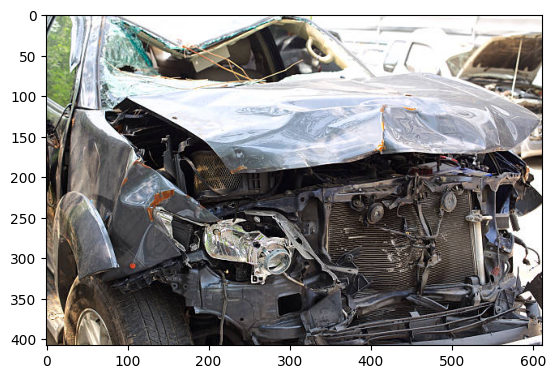

Greedy Search: a crushed car
Beam Search, K = 3: a crushed car
Beam Search, K = 5: a crushed car
Beam Search, K = 7: a crushed car
Beam Search, K = 10: a crushed car


In [ ]:
pic = '29ced254-125412999.jpg'
image = encoding_test[pic].reshape((1,2048))
x=plt.imread(images_path+pic)
plt.imshow(x)
plt.show()

print("Greedy Search:",greedySearch(image))
print("Beam Search, K = 3:",beam_search_predictions(image, beam_index = 3))
print("Beam Search, K = 5:",beam_search_predictions(image, beam_index = 5))
print("Beam Search, K = 7:",beam_search_predictions(image, beam_index = 7))
print("Beam Search, K = 10:",beam_search_predictions(image, beam_index = 10))

"""
Generate and Display Image Captions using Different Strategies.

This code generates image captions using both Greedy Search and Beam Search strategies with varying beam widths.

Parameters:
- pic (str): File name of the image.
- image (np.ndarray): Image feature representing the input image.

Returns:
- None: Displays the image and prints captions using different strategies.

"""


we can observe that the end result image is crushed car and by observing the out put image we know whether the car is a crushed car or not .

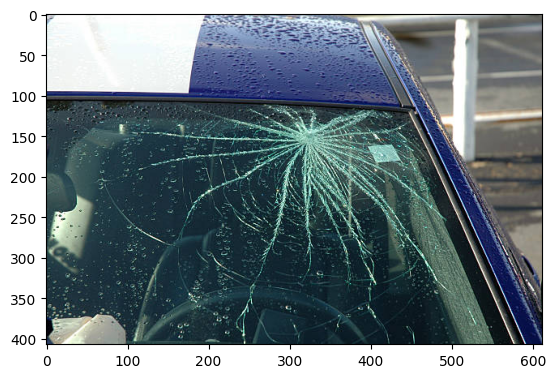

Greedy: a broken car
Beam Search, K = 3: a broken car
Beam Search, K = 5: a broken car
Beam Search, K = 7: a broken car


In [ ]:
pic = list(encoding_test.keys())[16]
image = encoding_test[pic].reshape((1,2048))
x=plt.imread(images_path+pic)
plt.imshow(x)
plt.show()

print("Greedy:",greedySearch(image))
print("Beam Search, K = 3:",beam_search_predictions(image, beam_index = 3))
print("Beam Search, K = 5:",beam_search_predictions(image, beam_index = 5))
print("Beam Search, K = 7:",beam_search_predictions(image, beam_index = 7))

"""
Generate and Display Image Captions using Different Strategies for a Specific Image.

This code generates image captions using both Greedy Search and Beam Search strategies with varying beam widths for a specific image.

Parameters:
- pic (str): File name of the image.
- image (np.ndarray): Image feature representing the input image.

Returns:
- None: Displays the image and prints captions using different strategies.

"""

By observing the output we can clearly know that the car is broken car as in the image the glass of the blue car is broken.


In [ ]:
train_img

['/content/drive/MyDrive/yolov7/Annotated_Cars_Dataset/images/88825c05-125412555.jpg',
 '/content/drive/MyDrive/yolov7/Annotated_Cars_Dataset/images/86dffabf-125429708.jpg',
 '/content/drive/MyDrive/yolov7/Annotated_Cars_Dataset/images/7128b56a-125421130.jpg',
 '/content/drive/MyDrive/yolov7/Annotated_Cars_Dataset/images/8e600749-125430591.jpg',
 '/content/drive/MyDrive/yolov7/Annotated_Cars_Dataset/images/662acd41-125431869.jpg',
 '/content/drive/MyDrive/yolov7/Annotated_Cars_Dataset/images/68506a8d-125431464.jpg',
 '/content/drive/MyDrive/yolov7/Annotated_Cars_Dataset/images/75cd383e-125416293.jpg',
 '/content/drive/MyDrive/yolov7/Annotated_Cars_Dataset/images/7cfcb09b-125431279.jpg',
 '/content/drive/MyDrive/yolov7/Annotated_Cars_Dataset/images/7208fd9a-125430067.jpg',
 '/content/drive/MyDrive/yolov7/Annotated_Cars_Dataset/images/87dab4df-125419675.jpg',
 '/content/drive/MyDrive/yolov7/Annotated_Cars_Dataset/images/7f6bdfd1-125414764.jpg',
 '/content/drive/MyDrive/yolov7/Annotated_C

In [ ]:
len(train_img)

1533

In [ ]:
train_images_list = [i.split('/')[-1] for i in train_img]

In [ ]:
train_images_list

['88825c05-125412555.jpg',
 '86dffabf-125429708.jpg',
 '7128b56a-125421130.jpg',
 '8e600749-125430591.jpg',
 '662acd41-125431869.jpg',
 '68506a8d-125431464.jpg',
 '75cd383e-125416293.jpg',
 '7cfcb09b-125431279.jpg',
 '7208fd9a-125430067.jpg',
 '87dab4df-125419675.jpg',
 '7f6bdfd1-125414764.jpg',
 '8ab91c40-125415684.jpg',
 '8f0a6bed-125413783.jpg',
 '7dd598b7-125430470.jpg',
 '7d25a968-125421427.jpg',
 '8534af25-125429677.jpg',
 '63e39218-125428593.jpg',
 '79304c84-125432049.jpg',
 '64032b61-125431875.jpg',
 '87c8fd1d-125416827.jpg',
 '79669bef-125415520.jpg',
 '659e6c6c-125431503.jpg',
 '69b2c476-125429454.jpg',
 '8d7e3191-125419673.jpg',
 '6f81b81b-125418772.jpg',
 '76f2ea14-125430955.jpg',
 '6d0917a9-125415778.jpg',
 '8cdac6e0-125429465.jpg',
 '640b6468-125420609.jpg',
 '77348fb9-125415653.jpg',
 '8bb20856-125420823.jpg',
 '7f67f12d-125416378.jpg',
 '784508da-125422059.jpg',
 '71a5dcd2-125429732.jpg',
 '905b5b45-125414074.jpg',
 '79468d17-125413698.jpg',
 '6994ef9c-125430438.jpg',
 

In [ ]:
train_image_captions = dict()
for single_img in train_images_list:
  image = encoding_train[single_img].reshape((1,2048))
  train_image_captions[single_img] = [greedySearch(image), beam_search_predictions(image, beam_index = 3)]

"""
Generate Predicted Captions for Training Images.

This code generates predicted captions for training images using both Greedy Search and Beam Search.

Parameters:
- train_images_list (list): List of file names for training images.
- encoding_train (dict): Dictionary containing image features for training images.

Returns:
- dict: Dictionary containing predicted captions for training images.

"""


In [ ]:
train_image_captions

{'88825c05-125412555.jpg': ['a car with a dent', 'a car with a dent'],
 '86dffabf-125429708.jpg': ['a crushed car', 'a crushed car'],
 '7128b56a-125421130.jpg': ['a car with a dent', 'a car with a dent'],
 '8e600749-125430591.jpg': ['a crushed car', 'a crushed car'],
 '662acd41-125431869.jpg': ['a car with a dent', 'a car with a dent'],
 '68506a8d-125431464.jpg': ['a car with a scratch', 'a car with a scratch'],
 '75cd383e-125416293.jpg': ['a broken car', 'a broken car'],
 '7cfcb09b-125431279.jpg': ['a car with a dent', 'a car with a dent'],
 '7208fd9a-125430067.jpg': ['a car with a dent', 'a car with a dent'],
 '87dab4df-125419675.jpg': ['a car with a dent', 'a car with a dent'],
 '7f6bdfd1-125414764.jpg': ['a broken car', 'a broken car'],
 '8ab91c40-125415684.jpg': ['a car with a dent', 'a car with a dent'],
 '8f0a6bed-125413783.jpg': ['a broken car', 'a broken car'],
 '7dd598b7-125430470.jpg': ['a car with a dent', 'a car with a dent'],
 '7d25a968-125421427.jpg': ['a crushed car', '

In [ ]:
import json

with open('caption_prediction_data_greedy_beam.json', 'w') as fp:
    json.dump(train_image_captions, fp)

"""
Save Image Captions to a JSON File.

This code saves image captions to a JSON file.

Parameters:
- file_path (str): File path where the JSON file will be saved.
- captions_data (dict): Dictionary containing image captions.

Returns:
- None: Saves the image captions to the specified JSON file.

"""


In [ ]:
import pickle
"""
Import the 'pickle' Module.

This code imports the 'pickle' module, which is used for serializing and deserializing Python objects.

Parameters:
- None: No parameters are required.

Returns:
- None: Imports the 'pickle' module for use in the current script or module.

"""


In [ ]:
filename = 'caption_generation_model.sav'
pickle.dump(model, open(filename, 'wb'))

"""
Save a Trained Model using Pickle.

This code saves a trained model using the 'pickle' module.

Parameters:
- filename (str): File name or path where the model will be saved.
- model: Trained model to be saved.

Returns:
- None: Saves the trained model to the specified file using 'pickle'.

"""

In [ ]:
filename = 'caption_generation_model.h5'
pickle.dump(model, open(filename, 'wb'))

"""
Save a Trained Model in HDF5 Format using Pickle.

This code saves a trained model in HDF5 format using the 'pickle' module.

Parameters:
- filename (str): File name or path where the model will be saved.
- model: Trained model to be saved.

Returns:
- None: Saves the trained model to the specified file in HDF5 format using 'pickle'.

"""

In [ ]:
train_descriptions = dict()
for line in new_descriptions.split('\n'):
    tokens = line.split()
    image_id, image_desc = tokens[0], tokens[1:]
    if image_id in train:
        if image_id not in train_descriptions:
            train_descriptions[image_id+'.jpg'] = list()
        train_descriptions[image_id+'.jpg'].append(' '.join(image_desc))

"""
Create a Dictionary of Training Image Descriptions.

This code processes and organizes image descriptions into a dictionary for training purposes.

Parameters:
- new_descriptions (str): String containing image descriptions.
- train (set): Set of identifiers for training images.

Returns:
- dict: Dictionary containing image descriptions for training images.

"""

In [ ]:
train_descriptions

{'f531dc35-125432068.jpg': ['a car with a scratch'],
 '79304c84-125432049.jpg': ['a car with no damage'],
 '3abf7e00-125432006.jpg': ['a car with a scratch'],
 'e84d49b9-125432004.jpg': ['a car with a scratch'],
 'f59fc364-125432002.jpg': ['a car with a dent'],
 'cb8b4cf3-125431991.jpg': ['a car with a dent'],
 '60258cb3-125431989.jpg': ['a broken car'],
 '59d7d1ac-125431970.jpg': ['a crushed car'],
 'd774c50d-125431964.jpg': ['a car with a dent'],
 '3fe59d90-125431953.jpg': ['a broken car'],
 '700ff59c-125431946.jpg': ['a crushed car'],
 '7a18e463-125431945.jpg': ['a crushed car'],
 'c4ed5c0b-125431943.jpg': ['a car with a dent'],
 'fcf70dd6-125431922.jpg': ['a car with a scratch'],
 '8cd345cd-125431913.jpg': ['a car with no damage'],
 'f56ee9fa-125431905.jpg': ['a car with a scratch'],
 '3e548778-125431904.jpg': ['a car with a scratch'],
 '7b1226c5-125431891.jpg': ['a car with a scratch'],
 'deb567fa-125431889.jpg': ['a car with a scratch'],
 'be1ee863-125431887.jpg': ['a car with a 

In [ ]:
len(train_image_captions)

1533

In [ ]:
def compute_accuracy(y_true, y_pred):
    correct_predictions_gs = 0
    correct_predictions_bs = 0
    for each_key in y_true.keys():
        print("pred0 -", y_pred[each_key][0])
        print("pred1 -", y_pred[each_key][1])
        print("true -", y_true[each_key])
        if y_true[each_key][0] == y_pred[each_key][0]:
            correct_predictions_gs += 1

        if y_true[each_key] == y_pred[each_key][1]:
            correct_predictions_bs += 1
    accuracy_gs, accuracy_bs = correct_predictions_gs/len(y_true), correct_predictions_bs/len(y_true)
    print(correct_predictions_bs)
    return accuracy_gs, accuracy_bs

"""
Compute Accuracy for Greedy Search and Beam Search.

This code computes accuracy for both Greedy Search and Beam Search predictions.

Parameters:
- y_true (dict): True captions for images.
- y_pred (dict): Predicted captions for images using both Greedy Search and Beam Search.

Returns:
- tuple: Accuracy for Greedy Search and Beam Search.

"""


In [ ]:
compute_accuracy(train_descriptions, train_image_captions)

"""
Compute Accuracy for Train Image Captions.

This code computes accuracy for train image captions based on true and predicted captions.

Parameters:
- train_descriptions (dict): True captions for training images.
- train_image_captions (dict): Predicted captions for training images.

Returns:
- tuple: Accuracy for Greedy Search and Beam Search.

"""


pred0 - a car with a scratch
pred1 - a car with a scratch
true - ['a car with a scratch']
pred0 - a crushed car
pred1 - a crushed car
true - ['a car with no damage']
pred0 - a car with a scratch
pred1 - a car with a scratch
true - ['a car with a scratch']
pred0 - a car with a dent
pred1 - a car with a dent
true - ['a car with a scratch']
pred0 - a car with a dent
pred1 - a car with a dent
true - ['a car with a dent']
pred0 - a car with a dent
pred1 - a car with a dent
true - ['a car with a dent']
pred0 - a broken car
pred1 - a broken car
true - ['a broken car']
pred0 - a car with a dent
pred1 - a car with a dent
true - ['a crushed car']
pred0 - a car with a dent
pred1 - a car with a dent
true - ['a car with a dent']
pred0 - a broken car
pred1 - a broken car
true - ['a broken car']
pred0 - a car with a dent
pred1 - a car with a dent
true - ['a crushed car']
pred0 - a crushed car
pred1 - a crushed car
true - ['a crushed car']
pred0 - a crushed car
pred1 - a crushed car
true - ['a car wit

(0.6568819308545336, 0.0)

In [ ]:
# 5148total images  images total after image cleaning -

So finall we are getting to know whether the car is a damaged or not .By using the image recognision we made it easy and accessible to acess whether the car is a damaged or not .Manually doing it with man power takes a lot of time and manpower so we made it easy . In real time use case  example and insurance company molin's_insurance can use this to ease the business.